In [139]:
# %%
###### Start of import packages ######
import sys
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from statistics import mean, stdev
from sklearn import linear_model
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import cm as cm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb


pd.set_option('display.max_rows', 100)
###### To ignore warnings ######
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

###### End of import packages ######

sns.set()

In [140]:
# %%
dataset = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [141]:
# %%
dataset.isnull().sum()



Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [142]:
# %%
# Remove Nulls
# dataset.dropna(axis=1,inplace=True)
dataset.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC',
                 'Fence', 'MiscFeature','GarageType','GarageFinish'], axis=1, inplace=True)
# for x in range(0, dataset.shape[1]):
#     col = dataset.columns[x]
#     if (dataset[col].dtype == object):
#         dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
#     else:
#         dataset[col] = dataset[col].fillna(dataset[col].mean())

for i, column in enumerate(dataset):
    if (dataset[column].dtype == object):
        dataset[column] = dataset[column].fillna(dataset[column].mode()[0])
    else:
        dataset[column] = dataset[column].fillna(dataset[column].mean())


In [143]:
# %%
# Drop Highly Correlated
dataset.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'Exterior2nd',
                 'GarageYrBlt', 'MSSubClass'], axis=1, inplace=True)


In [144]:
# Drop Low Correlated
drops = ["Street", "LandContour", "Utilities", "LotConfig", "LandSlope",
             "Condition2", "MasVnrType", "BsmtCond", "BsmtFinType2", "BsmtFinSF2",
             "BsmtHalfBath", "LowQualFinSF", "3SsnPorch", "MiscVal", "MoSold",
             "YrSold"]
dataset = dataset.drop(drops, axis=1)


In [145]:
# Drop outliers
dataset = dataset[(dataset['LotArea'] < 20000)]
dataset = dataset[(dataset['BsmtFinSF1'] < 2300)]
dataset = dataset[(dataset['TotalBsmtSF'] < 5000)]
dataset = dataset[(dataset['GrLivArea'] < 4600)]
dataset = dataset[(dataset['OpenPorchSF'] < 380)]


In [146]:
# Drop Not Important
drops = ["RoofMatl", "Heating", "Electrical", "Functional",
             "GarageQual", "GarageCond", "PavedDrive"]
dataset = dataset.drop(drops, axis=1)


In [147]:
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,1,RL,8450,Reg,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,Y,854,1710,1,2,1,3,1,Gd,0,548,0,61,0,0,0,WD,Normal,208500
1,2,RL,9600,Reg,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,Y,0,1262,0,2,0,3,1,TA,1,460,298,0,0,0,0,WD,Normal,181500
2,3,RL,11250,IR1,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,Y,866,1786,1,2,1,3,1,Gd,1,608,0,42,0,0,0,WD,Normal,223500
3,4,RL,9550,IR1,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,Y,756,1717,1,1,0,3,1,Gd,1,642,0,35,272,0,0,WD,Abnorml,140000
4,5,RL,14260,IR1,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,Y,1053,2198,1,2,1,4,1,Gd,1,836,192,84,0,0,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,7917,Reg,Gilbert,Norm,1Fam,2Story,6,5,1999,2000,Gable,VinylSd,0.0,TA,TA,PConc,Gd,No,Unf,0,953,953,Ex,Y,694,1647,0,2,1,3,1,TA,1,460,0,40,0,0,0,WD,Normal,175000
1456,1457,RL,13175,Reg,NWAmes,Norm,1Fam,1Story,6,6,1978,1988,Gable,Plywood,119.0,TA,TA,CBlock,Gd,No,ALQ,790,589,1542,TA,Y,0,2073,1,2,0,3,1,TA,2,500,349,0,0,0,0,WD,Normal,210000
1457,1458,RL,9042,Reg,Crawfor,Norm,1Fam,2Story,7,9,1941,2006,Gable,CemntBd,0.0,Ex,Gd,Stone,TA,No,GLQ,275,877,1152,Ex,Y,1152,2340,0,2,0,4,1,Gd,2,252,0,60,0,0,0,WD,Normal,266500
1458,1459,RL,9717,Reg,NAmes,Norm,1Fam,1Story,5,6,1950,1996,Hip,MetalSd,0.0,TA,TA,CBlock,TA,Mn,GLQ,49,0,1078,Gd,Y,0,1078,1,1,0,2,1,Gd,0,240,366,0,112,0,0,WD,Normal,142125


In [148]:
# dataset["SaleType_WD"] = dataset['SaleType'].apply(lambda x: 1 if x=='WD' else 0)
# dataset["SaleType_CWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='CWD' else 0)
# dataset["SaleType_VWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='VWD' else 0)
dataset["SaleType"] = dataset['SaleType'].apply(lambda x: 1 if x=="New" else 0)
# dataset["SaleType_COD"] = dataset['SaleType'].apply(lambda x: 1 if x=='COD' else 0)
# dataset["SaleType_Con"] = dataset['SaleType'].apply(lambda x: 1 if x=='Con' else 0)
# dataset["SaleType_ConLw"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLw' else 0)
# dataset["SaleType_ConLI"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLI' else 0)
# dataset["SaleType_ConLD"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLD' else 0)
# dataset["SaleType_Oth"] = dataset['SaleType'].apply(lambda x: 1 if x=='Oth' else 0)


In [149]:
# Transform to Object
for x in range(0, dataset.shape[1]):
    if (dataset[dataset.columns[x]].dtype == object):
        le = preprocessing.LabelEncoder()
        le.fit(dataset[dataset.columns[x]])
        dataset[dataset.columns[x]] = le.transform(dataset[dataset.columns[x]])

In [150]:
# %%
# Scale Price
# dataset = np.log1p(dataset)
# dataset.SalePrice = np.log1p(dataset.SalePrice)

In [151]:
# # plot_features_to_SalePrice
# def chunks(l, n):
#     return [l[i:i + n] for i in range(0, len(l), n)]

# cols = dataset.columns
# for x in chunks(cols, 5):
#     sns.pairplot(dataset, y_vars=['SalePrice'], x_vars=x)

In [152]:
# Scale Data
dataset.BsmtFinSF1 = np.log1p(dataset.BsmtFinSF1)
dataset.BsmtUnfSF = np.log1p(dataset.BsmtUnfSF)
dataset.TotalBsmtSF = np.log1p(dataset.TotalBsmtSF)
dataset.GarageArea = np.log1p(dataset.GarageArea)
dataset.GrLivArea = np.log1p(dataset.GrLivArea)
dataset.LotArea = np.log1p(dataset.LotArea)
dataset.MasVnrArea = np.log1p(dataset.MasVnrArea)
dataset.OpenPorchSF = np.log1p(dataset.OpenPorchSF)
dataset.EnclosedPorch = np.log1p(dataset.EnclosedPorch)
dataset.WoodDeckSF = np.log1p(dataset.WoodDeckSF)

In [153]:
pd.set_option('display.max_columns',None)
dataset

,Id,MSZoning,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,1,3,9.042040,3,5,2,0,5,7,5,2003,2003,1,12,5.283204,2,4,2,2,3,2,6.561031,5.017280,6.753438,0,1,854,7.444833,1,2,1,3,1,2,0,6.308098,0.000000,4.127134,0.000000,0,0,0,4,208500
1,2,3,9.169623,3,24,1,0,2,6,8,1976,1976,1,8,0.000000,3,4,1,2,1,0,6.886532,5.652489,7.141245,0,1,0,7.141245,0,2,0,3,1,3,1,6.133398,5.700444,0.000000,0.000000,0,0,0,4,181500
2,3,3,9.328212,0,5,2,0,5,7,5,2001,2002,1,12,5.093750,2,4,2,2,2,2,6.188264,6.075346,6.825460,0,1,866,7.488294,1,2,1,3,1,2,1,6.411818,0.000000,3.761200,0.000000,0,0,0,4,223500
3,4,3,9.164401,0,6,2,0,5,7,5,1915,1970,1,13,0.000000,3,4,0,3,3,0,5.379897,6.293419,6.629363,2,1,756,7.448916,1,1,0,3,1,2,1,6.466145,0.000000,3.583519,5.609472,0,0,0,0,140000
4,5,3,9.565284,0,15,2,0,5,8,5,2000,2000,1,12,5.860786,2,4,2,2,0,2,6.486161,6.196444,7.044033,0,1,1053,7.695758,1,2,1,4,1,2,1,6.729824,5.262690,4.442651,0.000000,0,0,0,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,3,8.976894,3,8,2,0,5,6,5,1999,2000,1,12,0.000000,3,4,2,2,3,5,0.000000,6.860664,6.860664,0,1,694,7.407318,0,2,1,3,1,3,1,6.133398,0.000000,3.713572,0.000000,0,0,0,4,175000
1456,1457,3,9.486152,3,14,2,0,2,6,6,1978,1988,1,9,4.787492,3,4,1,2,3,0,6.673298,6.380123,7.341484,4,1,0,7.637234,1,2,0,3,1,3,2,6.216606,5.857933,0.000000,0.000000,0,0,0,4,210000
1457,1458,3,9.109746,3,6,2,0,5,7,9,1941,2006,1,5,0.000000,0,2,4,3,3,2,5.620401,6.777647,7.050123,0,1,1152,7.758333,0,2,0,4,1,2,2,5.533389,0.000000,4.110874,0.000000,0,0,0,4,266500
1458,1459,3,9.181735,3,12,2,0,2,5,6,1950,1996,3,8,0.000000,3,4,1,3,2,2,3.912023,0.000000,6.983790,2,1,0,6.983790,1,1,0,2,1,2,0,5.484797,5.905362,0.000000,4.727388,0,0,0,4,142125


In [154]:
# corr = dataset.corr()
# plt.figure(figsize=(50,50))
# sns.heatmap(corr,cmap='coolwarm',annot=True, fmt='.2f')
# plt.show()
dataset.SalePrice = np.log1p(dataset.SalePrice)

In [155]:
# Remove Nulls Test
test.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC',
                 'Fence', 'MiscFeature','GarageType','GarageFinish'], axis=1, inplace=True)
# for x in range(0, test.shape[1]):
#     col = test.columns[x]
#     if (test[col].dtype == object):
#         test[col] = test[col].fillna(test[col].mode()[0])
#     else:
#         test[col] = test[col].fillna(test[col].mean())
for i, column in enumerate(test):
    if (test[column].dtype == object):
        test[column] = test[column].fillna(test[column].mode()[0])
    else:
        test[column] = test[column].fillna(test[column].mean())

In [156]:
# Drop Highly Corr Test
test.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'Exterior2nd',
                 'GarageYrBlt', 'MSSubClass'], axis=1, inplace=True)

In [157]:
# Drop Low Corr Test
drops = ["Street", "LandContour", "Utilities", "LotConfig", "LandSlope",
             "Condition2", "MasVnrType", "BsmtCond", "BsmtFinType2", "BsmtFinSF2",
             "BsmtHalfBath", "LowQualFinSF", "3SsnPorch", "MiscVal", "MoSold",
             "YrSold"]
test = test.drop(drops, axis=1)

In [158]:
# Not Important Test
drops = ["RoofMatl", "Heating", "Electrical", "Functional",
             "GarageQual", "GarageCond", "PavedDrive"]
test = test.drop(drops, axis=1)

In [159]:
# dataset["SaleType_WD"] = dataset['SaleType'].apply(lambda x: 1 if x=='WD' else 0)
# dataset["SaleType_CWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='CWD' else 0)
# dataset["SaleType_VWD"] = dataset['SaleType'].apply(lambda x: 1 if x=='VWD' else 0)
test["SaleType"] = test['SaleType'].apply(lambda x: 1 if x=='New' else 0)
# dataset["SaleType_COD"] = dataset['SaleType'].apply(lambda x: 1 if x=='COD' else 0)
# dataset["SaleType_Con"] = dataset['SaleType'].apply(lambda x: 1 if x=='Con' else 0)
# dataset["SaleType_ConLw"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLw' else 0)
# dataset["SaleType_ConLI"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLI' else 0)
# dataset["SaleType_ConLD"] = dataset['SaleType'].apply(lambda x: 1 if x=='ConLD' else 0)
# dataset["SaleType_Oth"] = dataset['SaleType'].apply(lambda x: 1 if x=='Oth' else 0)

In [160]:
# Transform Object Test
for x in range(0, test.shape[1]):
        if (test[test.columns[x]].dtype == object):
            le = preprocessing.LabelEncoder()
            le.fit(test[test.columns[x]])
            test[test.columns[x]] = le.transform(
                test[test.columns[x]])

In [161]:
# Scale Data
# dataset = np.log1p(dataset)
test.BsmtFinSF1 = np.log1p(test.BsmtFinSF1)
test.BsmtUnfSF = np.log1p(test.BsmtUnfSF)
test.TotalBsmtSF = np.log1p(test.TotalBsmtSF)
test.GarageArea = np.log1p(test.GarageArea)
test.GrLivArea = np.log1p(test.GrLivArea)
test.LotArea = np.log1p(test.LotArea)
test.MasVnrArea = np.log1p(test.MasVnrArea)
test.OpenPorchSF = np.log1p(test.OpenPorchSF)
test.EnclosedPorch = np.log1p(test.EnclosedPorch)
test.WoodDeckSF = np.log1p(test.WoodDeckSF)

In [162]:
print(dataset.shape)

(1449, 44)


best combination (ACC: 0.865): (1, 2, 4, 7, 8, 9, 10, 11, 12, 21, 23, 25, 27, 30, 32, 33, 34, 41, 42)



(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

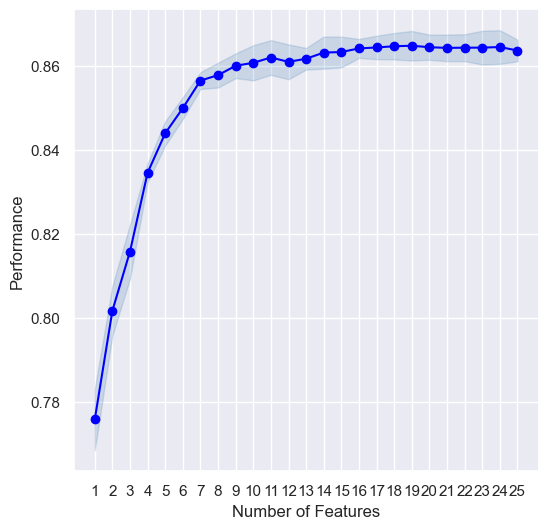

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

array = dataset.values
testarray = test.values
n = dataset.shape[1]
n = n-1

test_X = testarray[:, 0:n]  # features
X = array[:, 0:n]  # features
Y = array[:, n]  # target

XX = dataset.iloc[:, ~dataset.columns.isin(['Id','SalePrice'])]
YY = dataset[['SalePrice']]

def mrse(y_true,y_pred):
    return 1 - np.sqrt(mean_squared_error(y_true,y_pred))

scorer = make_scorer(mrse,greater_is_better=True)


rfr = RandomForestRegressor()
sfs_range = SFS(estimator=rfr,
                k_features=(16,25),
                forward=True,
                floating=False,
                scoring=scorer,
                cv=2,n_jobs=8)

sfs_range.fit(X,Y)

# print the accuracy of the best combination as well as the set of best features
print('best combination (ACC: %.3f): %s\n' % (sfs_range.k_score_, sfs_range.k_feature_idx_))

plt.rcParams["figure.figsize"] = (6,6)
# use the plot_sfs to visualize all accuracies
plot_sfs(sfs_range.get_metric_dict(), kind='std_err')

In [164]:
X_sfs = sfs_range.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_sfs, Y, test_size=0.4, random_state=200)  # test = 40%, train = 60%


In [165]:
print("\nElasticNet")
ens_test = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.0015, 0.01, 0.015, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
                                     l1_ratio=[0.01, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99], max_iter=10000).fit(x_train, y_train)
ens_result = ens_test.predict(x_test)
print('\tR2: {}'.format(r2_score(ens_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(ens_result, y_test))))
scores = cross_val_score(ens_test, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



ElasticNet
	R2: 0.8781285633510617
	RMSE: 0.13029056056152244
	Accuracy: 0.90 (+/- 0.02)


In [166]:
print("\nXgBoost")
xg_reg = xgb.XGBRegressor(objective='reg:linear', eval_metric='logloss',
                          scoring='neg_mean_squared_error', subsample=0.95, colsample_bytree=0.3, learning_rate=0.04,
                          max_depth=2, alpha=0.1, n_estimators=1000,)
xg_reg.fit(x_train, y_train)
preds = xg_reg.predict(x_test)
scores = cross_val_score(xg_reg, X, Y, cv=5)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


XgBoost
[14:46:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scoring" } are not used.

[14:46:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "scoring" } are not used.

[14:46:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\

In [167]:
print("\nGradientBoostingRegressor")
g_best = ensemble.GradientBoostingRegressor(n_estimators=1850, random_state=1234, learning_rate=0.02, max_depth=3,
                                            max_features='log2', min_samples_leaf=11, min_samples_split=15, loss='huber').fit(x_train, y_train)
g_best_result = g_best.predict(x_test)
print('\tR2: {}'.format(r2_score(g_best_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(g_best_result, y_test))))
scores = cross_val_score(g_best, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


GradientBoostingRegressor
	R2: 0.8953347301140842
	RMSE: 0.12095422895517453
	Accuracy: 0.92 (+/- 0.01)


In [168]:
print("\nLinearRegression")
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)
lr_result = lr.predict(x_test)
print('\tR2: {}'.format(r2_score(lr_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(lr_result, y_test))))
scores = cross_val_score(lr, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


LinearRegression
	R2: 0.8781660680845289
	RMSE: 0.13029247119114376
	Accuracy: 0.90 (+/- 0.02)


In [169]:
print("\nRidge Regression")
ridge = Ridge(max_iter=50000)
ridge_est = GridSearchCV(
    ridge, param_grid={"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
ridge_est.fit(x_train, y_train)
ridge_result = ridge_est.predict(x_test)
print('\tR2: {}'.format(r2_score(ridge_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(ridge_result, y_test))))
scores = cross_val_score(ridge_est, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Ridge Regression
	R2: 0.8781230204132713
	RMSE: 0.1302912034963339
	Accuracy: 0.90 (+/- 0.02)


In [170]:
print("\nLasso Regression")
lasso = Lasso(max_iter=50000)
lasso_est = GridSearchCV(
    lasso, param_grid={"alpha": np.arange(0.0005, 0.001, 0.00001)})
lasso_est.fit(x_train, y_train)
lasso_result = lasso_est.predict(x_test)
print('\tR2: {}'.format(r2_score(lasso_result, y_test)))
print('\tRMSE: {}'.format(np.sqrt(mean_squared_error(lasso_result, y_test))))
scores = cross_val_score(lasso_est, X, Y, cv=5)
print("\tAccuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Lasso Regression
	R2: 0.8777318457168236
	RMSE: 0.13000272673550423
	Accuracy: 0.90 (+/- 0.02)


In [171]:
result = np.exp(g_best.predict(test.iloc[:,[1, 2, 4, 7, 8, 9, 10, 11, 12, 21, 23, 25, 27, 30, 32, 33, 34, 41, 42]]))
output = pd.DataFrame({'Id': test.Id, 'SalePrice': result})
print(output)
output.to_csv('submission.csv', index=False)

        Id      SalePrice
0     1461  130743.822886
1     1462  166024.065874
2     1463  177472.151656
3     1464  193795.507018
4     1465  185424.430187
...    ...            ...
1454  2915   86159.605693
1455  2916   80723.752311
1456  2917  165388.659394
1457  2918  128266.400319
1458  2919  215878.943287

[1459 rows x 2 columns]
